# Introdução à classificação com KNN

# Exemplo 1 - Alimentos

In [1]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [107]:
# Criando uma base de dados

alimento = ['uva', 'batata', 'laranja', 'nozes', 'cenoura', 'pistache', 'maca'] # Observações, elementos, itens, ocorrências...
dados = {
    'docura': [8,4,7,3,5,5,8], # Feature 1 (característica) numérica e inteira
    'crocancia': [4,6,3,7,6,8,6], # Feature 2 (característica) numérica e inteira
    'classe': ['fruta', 'legume', 'fruta', 'oleaginosa', 'legume', 'oleaginosa', 'fruta'] # Labels ou categorias
}

df = pd.DataFrame(data=dados,
                  index=alimento
                  )
df



,docura,crocancia,classe
uva,8,4,fruta
batata,4,6,legume
laranja,7,3,fruta
nozes,3,7,oleaginosa
cenoura,5,6,legume
pistache,5,8,oleaginosa
maca,8,6,fruta


In [108]:
x = df[['docura', 'crocancia']] # X são as features preditoras, que fornecem informações sobre a característica ou fenômeno estudado
y = df.classe # Y é o objeto alvo, o que se deseja prever, classificar

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia o modelo
modelo = KNeighborsClassifier(n_neighbors=3, # k vizinhos
                              metric='euclidean')

# Ajusta o modelo aos dados (abstração)
modelo.fit(x, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [110]:
# Classifica elementos novos (generalização)

novo_alimento = [3,8] # Amendoim (oleaginosa)
modelo.predict([novo_alimento]) # Realiza previsões

array(['oleaginosa'], dtype=object)

O modelo foi capaz de classificar o novo alimento de forma correta, mas como ele se sairá classificando outros alimentos?

## Fazendo novas previsões

In [111]:
novo_alimento1 = [6,2] # Morango
novo_alimento2 = [3,8] # Amendoim
novo_alimento3 = [4,4] # Tomate
novo_alimento4 = [5,5] # Acerola

grupo_alimentos = [novo_alimento1, novo_alimento2, novo_alimento3, novo_alimento4] # Observações "não vistas" pelo modelo
grupo_tipos_alimentos = ['fruta', 'oleaginosa', 'fruta', 'fruta'] # São as classes reais

modelo.predict(grupo_alimentos)

array(['fruta', 'oleaginosa', 'legume', 'legume'], dtype=object)

Desta vez o modelo acertou 50% dos casos.<br>
Há diversos fatores que poderiam ter melhorado o seu desempenho, como a quantidade de dados fornecidas no treino, o valor de k e o valor informado para doçura e crocância dos novos alimentos.<br>
Há outro aspecto que podemos dar atenção é quanto a verificação do seu desempenho. O modelo testou com 4 alimentos, mas e se fossem 400?

## Desempenho do modelo

In [112]:
previsoes = modelo.predict(grupo_alimentos)

### Acurácia
Acurácia é a taxa de acerto global do modelo, a razão entre acertos e o total.

In [113]:
# Fazendo na "mão"
corretos = (previsoes == grupo_tipos_alimentos).sum()
total = len(grupo_tipos_alimentos)
taxa_acerto = corretos/total
print('A acurácia foi de %.2f%%' % (taxa_acerto*100))

A acurácia foi de 50.00%


In [114]:
# Usando o sckit-learn
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(grupo_tipos_alimentos, previsoes)
print('A acurácia foi de %.2f%%' % (taxa_acerto*100))

A acurácia foi de 50.00%


## Corrigindo a nomenclatura

In [115]:
df

,docura,crocancia,classe
uva,8,4,fruta
batata,4,6,legume
laranja,7,3,fruta
nozes,3,7,oleaginosa
cenoura,5,6,legume
pistache,5,8,oleaginosa
maca,8,6,fruta


In [116]:
# x
x_treino = df[['docura', 'crocancia']]

# y
y_treino = df.classe



novo_alimento1 = [6,2] # Morango
novo_alimento2 = [3,8] # Amendoim
novo_alimento3 = [4,4] # Tomate
novo_alimento4 = [5,5] # Acerola

# grupo_alimento
x_teste = [novo_alimento1, novo_alimento2, novo_alimento3, novo_alimento4]

# grupo_tipos_alimentos
y_teste = ['fruta', 'oleaginosa', 'fruta', 'fruta']

In [117]:
# Instancia o modelo
modelo = KNeighborsClassifier(n_neighbors=3,
                              metric='euclidean')

# Treino
modelo.fit(x_treino, y_treino)

# Teste
previsoes = modelo.predict(x_teste)

# Desempenho
taxa_acerto = accuracy_score(y_teste, previsoes)
print('A acurácia foi de %.2f%%' % (taxa_acerto*100))

A acurácia foi de 50.00%


***

# Detalhando o KNN

Podemos criar uma função para calcular as distâncias dos dados no exemplo anterior e entender melhor como o algoritmo funciona.

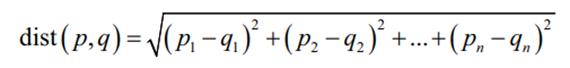

In [118]:
import numpy as np

def dist(x_teste, x_treino):
  distancia = []
  for posicao in range(len(x_teste)):
    for elemento in range(len(x_treino)):
      distancia.append(np.sqrt(np.sum(np.square(x_teste[posicao]-x_treino.values[elemento]))))

  return distancia


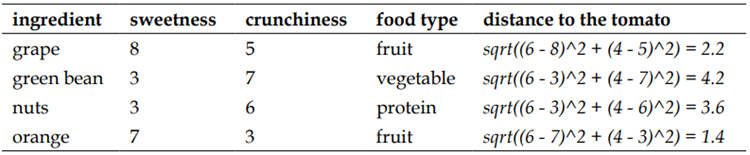

In [119]:
dist(x_teste, x_treino)

[2.8284271247461903,
 4.47213595499958,
 1.4142135623730951,
 5.830951894845301,
 4.123105625617661,
 6.082762530298219,
 4.47213595499958,
 6.4031242374328485,
 2.23606797749979,
 6.4031242374328485,
 1.0,
 2.8284271247461903,
 2.0,
 5.385164807134504,
 4.0,
 2.0,
 3.1622776601683795,
 3.1622776601683795,
 2.23606797749979,
 4.123105625617661,
 4.47213595499958,
 3.1622776601683795,
 1.4142135623730951,
 2.8284271247461903,
 2.8284271247461903,
 1.0,
 3.0,
 3.1622776601683795]

***


# Exemplo 2 - Trantando dados para a classificação de Churn

Vamos utilizar um dataset que contêm informações sobre clientes de uma fictícia empresa de Telecom, bem como a informação de churn - uma medida utilizada para medir a taxa de rotatividade de uma base de clientes. O objetivo é **treinar um modelo para classificar**, com base nos dados dos clientes, **se haverá churn ou não**.<br><br>

Os missing values desta base de dados já foram tratados, mas há necessidade de tratamento de outras informações.

In [2]:
churn = pd.read_csv('https://raw.githubusercontent.com/lucas-mdsena/aula-intro-ml-knn/main/dados_churn.csv')
churn.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


As features estão em inglês, mas podem ser renomeadas.

In [121]:
renomear = {
    'customerID':'id_cliente',
    'Churn':'churn',
    'gender':'genero',
    'SeniorCitizen':'idoso',
    'Partner':'possui_parceiro',
    'Dependents':'possui_dependentes',
    'tenure':'meses_contrato',
    'PhoneService':'assina_telefone',
    'MultipleLines':'linhas_multiplas',
    'InternetService':'aasinatura_provedor_internet',
    'OnlineSecurity':'assinatura_seguranca',
    'OnlineBackup':'assinatura_backup',
    'DeviceProtection':'assinatura_protecao_dispositivo',
    'TechSupport':'assinatura_suporte_tecnico',
    'StreamingTV':'assinatura_tv_cabo',
    'StreamingMovies':'assinatura_streaming_filmes',
    'Contract':'tipo_contrato',
    'PaperlessBilling':'fatura_online',
    'PaymentMethod':'forma_pagamento',
    'Charges_Monthly':'valor_fatura_mensal',
    'Charges_Total':'valor_total_pago',
    'Charges_Daily':'valor_diario'
}

churn = churn.rename(columns=renomear)
churn.head(2)

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,...,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago,valor_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00


In [122]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7043 non-null   object 
 1   churn                            7043 non-null   object 
 2   genero                           7043 non-null   object 
 3   idoso                            7043 non-null   int64  
 4   possui_parceiro                  7043 non-null   object 
 5   possui_dependentes               7043 non-null   object 
 6   meses_contrato                   7043 non-null   int64  
 7   assina_telefone                  7043 non-null   object 
 8   linhas_multiplas                 7043 non-null   object 
 9   aasinatura_provedor_internet     7043 non-null   object 
 10  assinatura_seguranca             7043 non-null   object 
 11  assinatura_backup                7043 non-null   object 
 12  assinatura_protecao_

Como pode ser visto, não há missing values nem features com valores armazenados no tipo errado.

## Feature engineering
Este processo consiste em realizar transformações nas características existentes ou criar novas a partir delas, a fim de se melhorar o desempenho e ou treinar modelos de machine learning.<br>
Estas transformações podem ser normalizações ou padronizações de dados numéricos, tratar missing values, escolha de melhores features, encoding de variáveis categóricas.<br><br>

https://ateliware.com/blog/feature-engineering - Português<br>

https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10 - Inglês

### Encoding

In [123]:
churn.aasinatura_provedor_internet.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: aasinatura_provedor_internet, dtype: int64

Esta feature é do tipo categórica com 3 classes. Não podemos treinar nosso modelo com este tipo de dados, então fazemos um processo chamado encoding. Este processo consiste em converter features categóricas em numéricas sem realizar uma poderação arbitrária. No caso vamos transformar 1 features categórica em N-1 features binárias (N é a quantidade de classes).

In [124]:
for coluna in churn.iloc[:,1:21].columns:
  print(churn[coluna].value_counts())
  print('---------------')

No     5174
Yes    1869
Name: churn, dtype: int64
---------------
Male      3555
Female    3488
Name: genero, dtype: int64
---------------
0    5901
1    1142
Name: idoso, dtype: int64
---------------
No     3641
Yes    3402
Name: possui_parceiro, dtype: int64
---------------
No     4933
Yes    2110
Name: possui_dependentes, dtype: int64
---------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: meses_contrato, Length: 73, dtype: int64
---------------
Yes    6361
No      682
Name: assina_telefone, dtype: int64
---------------
No                  3390
Yes                 2971
No phone service     682
Name: linhas_multiplas, dtype: int64
---------------
Fiber optic    3096
DSL            2421
No             1526
Name: aasinatura_provedor_internet, dtype: int64
---------------
No                     3498
Yes                    2019
No internet service    1526
Name: assinatura_seguranca, dtype: int64
---------------
N

In [125]:
map_geral = {
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0
}
churn_map_geral = churn[['churn','genero','possui_parceiro','possui_dependentes','assina_telefone','fatura_online']].replace(map_geral)
churn_map_geral.head()

,churn,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online
0,0,0,1,1,1,1
1,0,1,0,0,1,0
2,1,1,0,0,1,1
3,1,1,1,0,1,1
4,1,0,1,0,1,1


In [126]:
map_geral = {
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0
}
churn_map_geral = churn[['churn','genero','possui_parceiro','possui_dependentes','assina_telefone','fatura_online']].replace(map_geral)

# get_dummies é um método pandas que converte features categóricas em dummies (binárias)
dummies = pd.get_dummies(churn.drop(['id_cliente','churn','genero','possui_parceiro','possui_dependentes','assina_telefone','fatura_online'], axis='columns'),
                         drop_first=bool # Elimina a primeira feature dummizada para gerar N-1
                         )

dados_tratados = pd.concat([churn_map_geral, dummies], axis='columns')
dados_tratados.head()

,churn,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online,idoso,meses_contrato,valor_fatura_mensal,valor_total_pago,...,assinatura_suporte_tecnico_Yes,assinatura_tv_cabo_No internet service,assinatura_tv_cabo_Yes,assinatura_streaming_filmes_No internet service,assinatura_streaming_filmes_Yes,tipo_contrato_One year,tipo_contrato_Two year,forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,0,1,1,1,1,0,9,65.6,593.30,...,1,0,1,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,9,59.9,542.40,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,1,0,4,73.9,280.85,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,1,1,1,13,98.0,1237.85,...,0,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,1,1,3,83.9,267.40,...,1,0,1,0,0,0,0,0,0,1


### Features com correlação perfeita entre si

Correlação é uma medida estatística que mede a dependência de um fenômeno sobre outro. Mais comumente utilizada, a correlação de Pearson varia de -1 a 1, sendo os extremos correlação perfeitas inversamente ou diretamente proporcionais, respectivamente. 0 representa fenômenos sem correlação.<br><br>
Importante destacar que **correlação não implica causalidade**.<br><br>
[Spurious Correlations](https://www.tylervigen.com/spurious-correlations)

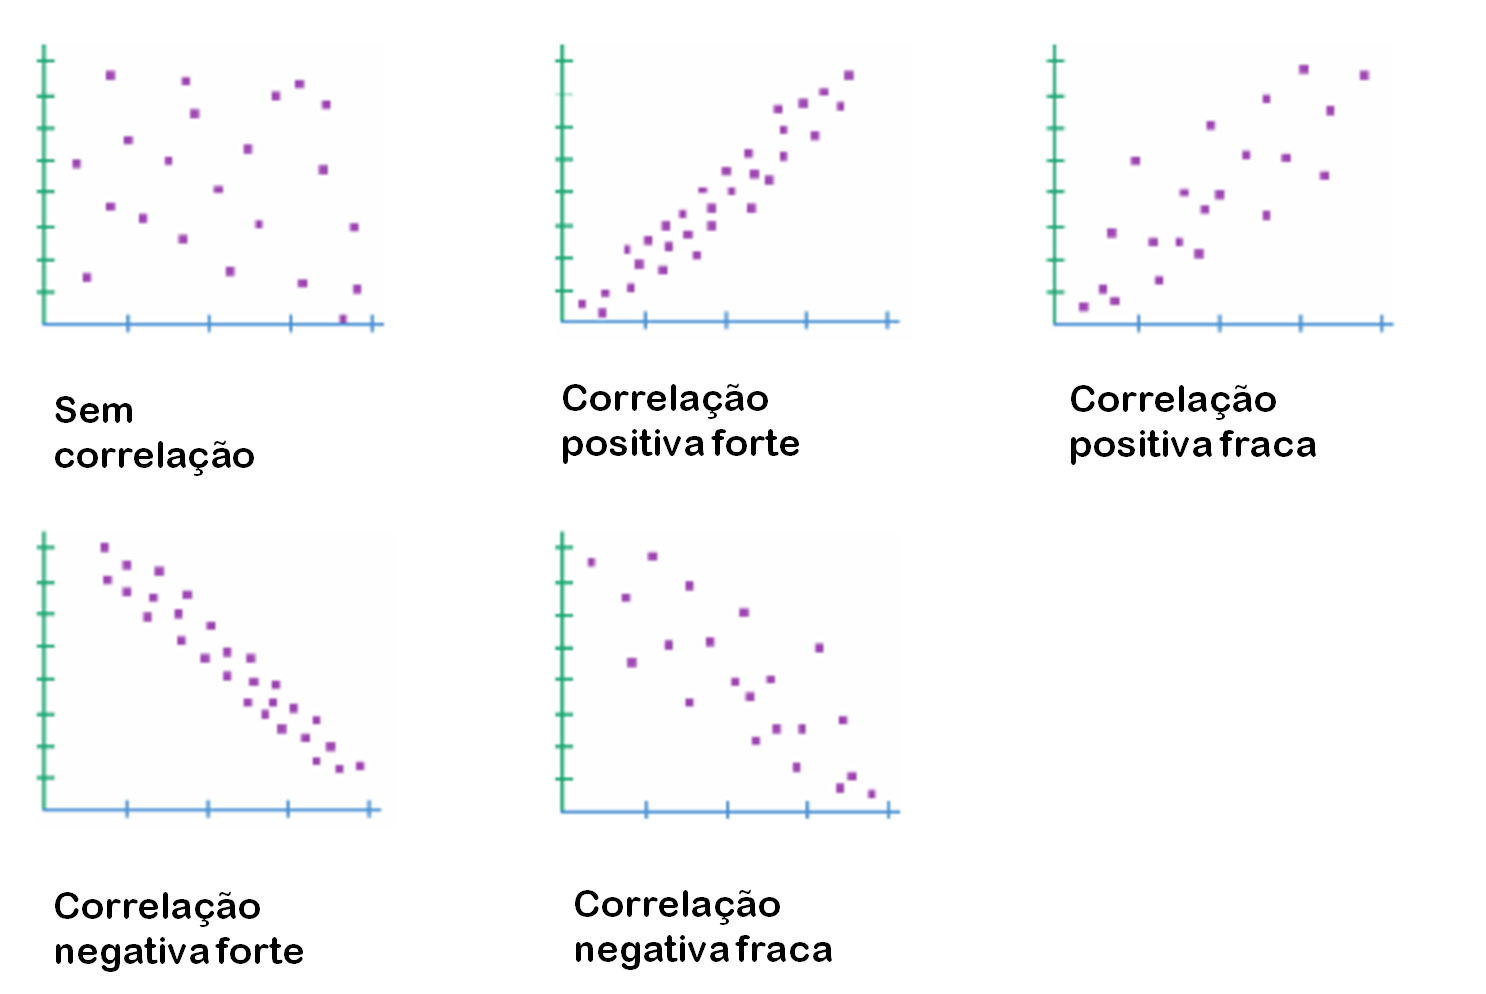

In [127]:
matriz_corr = dados_tratados.corr().round(1)

In [128]:
matriz_corr

,churn,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online,idoso,meses_contrato,valor_fatura_mensal,valor_total_pago,...,assinatura_suporte_tecnico_Yes,assinatura_tv_cabo_No internet service,assinatura_tv_cabo_Yes,assinatura_streaming_filmes_No internet service,assinatura_streaming_filmes_Yes,tipo_contrato_One year,tipo_contrato_Two year,forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
churn,1.0,-0.0,-0.2,-0.2,0.0,0.2,0.2,-0.4,0.2,-0.2,...,-0.2,-0.2,0.1,-0.2,0.1,-0.2,-0.3,-0.1,0.3,-0.1
genero,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
possui_parceiro,-0.2,-0.0,1.0,0.5,0.0,-0.0,0.0,0.4,0.1,0.3,...,0.1,0.0,0.1,0.0,0.1,0.1,0.2,0.1,-0.1,-0.1
possui_dependentes,-0.2,0.0,0.5,1.0,-0.0,-0.1,-0.2,0.2,-0.1,0.1,...,0.1,0.1,-0.0,0.1,-0.0,0.1,0.2,0.1,-0.2,0.1
assina_telefone,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.2,0.1,...,-0.1,0.2,-0.0,0.2,-0.0,-0.0,0.0,-0.0,0.0,-0.0
fatura_online,0.2,-0.0,-0.0,-0.1,0.0,1.0,0.2,0.0,0.4,0.2,...,0.0,-0.3,0.2,-0.3,0.2,-0.1,-0.1,-0.0,0.2,-0.2
idoso,0.2,-0.0,0.0,-0.2,0.0,0.2,1.0,0.0,0.2,0.1,...,-0.1,-0.2,0.1,-0.2,0.1,-0.0,-0.1,-0.0,0.2,-0.2
meses_contrato,-0.4,0.0,0.4,0.2,0.0,0.0,0.0,1.0,0.2,0.8,...,0.3,-0.0,0.3,-0.0,0.3,0.2,0.6,0.2,-0.2,-0.2
valor_fatura_mensal,0.2,-0.0,0.1,-0.1,0.2,0.4,0.2,0.2,1.0,0.7,...,0.3,-0.8,0.6,-0.8,0.6,0.0,-0.1,0.0,0.3,-0.4
valor_total_pago,-0.2,-0.0,0.3,0.1,0.1,0.2,0.1,0.8,0.7,1.0,...,0.4,-0.4,0.5,-0.4,0.5,0.2,0.4,0.2,-0.1,-0.3


In [129]:
filtro = matriz_corr[matriz_corr > 0.99].sum() # Filtrando correlações perfeitas
filtro # Onde o resultado é 1, apenas a correlação entre a feture e ela mesmo ficou perfeita

churn                                                  1.0
genero                                                 1.0
possui_parceiro                                        1.0
possui_dependentes                                     1.0
assina_telefone                                        1.0
fatura_online                                          1.0
idoso                                                  1.0
meses_contrato                                         1.0
valor_fatura_mensal                                    2.0
valor_total_pago                                       1.0
valor_diario                                           2.0
linhas_multiplas_No phone service                      1.0
linhas_multiplas_Yes                                   1.0
aasinatura_provedor_internet_Fiber optic               1.0
aasinatura_provedor_internet_No                        7.0
assinatura_seguranca_No internet service               7.0
assinatura_seguranca_Yes                               1

In [130]:
filtro = filtro[filtro > 1].index
filtro

Index(['valor_fatura_mensal', 'valor_diario',
       'aasinatura_provedor_internet_No',
       'assinatura_seguranca_No internet service',
       'assinatura_backup_No internet service',
       'assinatura_protecao_dispositivo_No internet service',
       'assinatura_suporte_tecnico_No internet service',
       'assinatura_tv_cabo_No internet service',
       'assinatura_streaming_filmes_No internet service'],
      dtype='object')

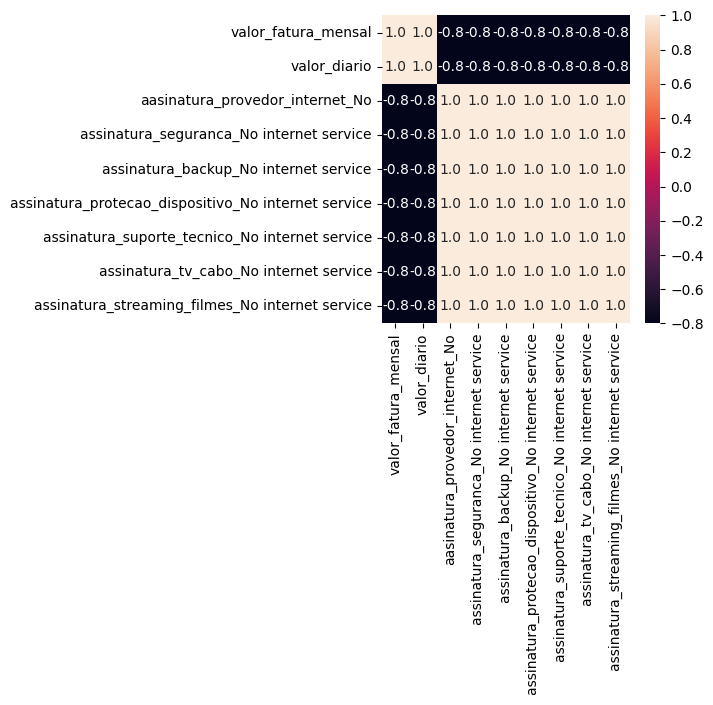

In [131]:
matriz_corr2 = dados_tratados[filtro].corr().round(1) # Nova matriz apenas com as correlações perfeitas

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
ax = sns.heatmap(matriz_corr2,
                 annot=True,
                 fmt='.1f')
ax=ax

Entre as features com correlações perfeitas, podemos deixar apenas uma, que representará o comportamento de todas as outras.

In [132]:
dados_tratados = dados_tratados.drop(['valor_diario',
                                      'assinatura_seguranca_No internet service',
                                      'assinatura_backup_No internet service',
                                      'assinatura_protecao_dispositivo_No internet service',
                                      'assinatura_suporte_tecnico_No internet service',
                                      'assinatura_tv_cabo_No internet service',
                                      'assinatura_streaming_filmes_No internet service'],
                                      axis=1)

In [133]:
dados_tratados.head()

,churn,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online,idoso,meses_contrato,valor_fatura_mensal,valor_total_pago,...,assinatura_backup_Yes,assinatura_protecao_dispositivo_Yes,assinatura_suporte_tecnico_Yes,assinatura_tv_cabo_Yes,assinatura_streaming_filmes_Yes,tipo_contrato_One year,tipo_contrato_Two year,forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,0,1,1,1,1,0,9,65.6,593.30,...,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,9,59.9,542.40,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,1,0,4,73.9,280.85,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,1,1,1,13,98.0,1237.85,...,1,1,0,1,1,0,0,0,1,0
4,1,0,1,0,1,1,1,3,83.9,267.40,...,0,0,1,1,0,0,0,0,0,1


## Treino, teste e validação do modelo

### Modelo baseline
A acurácia do modelo anterior foi de 50%, mas isso é bom ou ruim?<br>
Para se ter um fator de comparação, podemos criar um modelo de baseline usando um classificador dummy. Este modelo dummy irá classificar todas os dados de teste como uma única categoria e servirá de comparação para a nossa classificação com KNN.

**Novas métricas**

Matriz de correlação:<br>
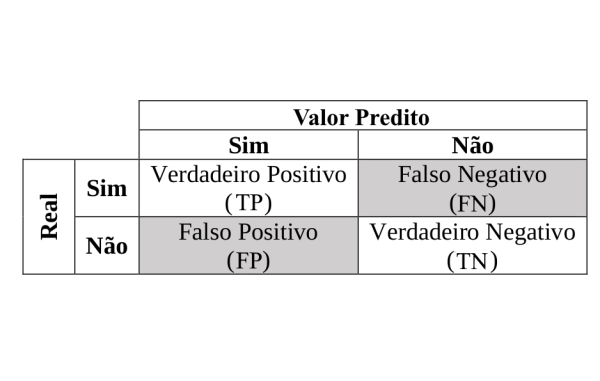

<br><br>
Precisão:<br>
Razão tp / (tp + fp)<br>
É a capacidade do modelo de não classificar um elemento negativo como positivo.


In [134]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split # Método da biblioteca Scikit-Learn para divisão de treino e teste

# Definir uma semente é importante para garantir e reprodutibilidade do resultado, quando se usa algum método de geração de números pseudo-aleatórios
seed = 100
np.random.seed(seed)

# Separando features preditoras e dependente
x = dados_tratados.drop('churn', axis=1)
y = dados_tratados.churn

# Divisão das bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,
                                                        y,
                                                        test_size=0.3, # Separa 30% dos dados para o teste
                                                        random_state=seed, # Utiliza a semente para fazer a escolha aleatória dos dados
                                                        stratify=y # Mantém a mesma proporção da feature churn no treino e no teste
                                                        )

# Padronização dos dados - Por que feita aqui e não junto das outras etapas de feature engineering?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_treino)
x_treino_pd = scaler.transform(x_treino)
x_teste_pd = scaler.transform(x_teste)

# Treino do modelo baseline
modelo_dummy_baseline = DummyClassifier(strategy='most_frequent') # Utilizamos a estratégia em que o modelo dummy irá classificar como a classe mais frenquênte no treino
modelo_dummy_baseline.fit(x_treino_pd, y_treino)

# Teste do modelo baseline
previsoes_dummy = modelo_dummy_baseline.predict(x_teste_pd)

# Avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

acuracia = accuracy_score(y_teste, previsoes_dummy)
precisao = precision_score(y_teste, previsoes_dummy)

print('O modelo foi treinado com %d elementos e testado com %d elementos' % (len(x_treino), len(x_teste)))
print('=====================================================================')
print(confusion_matrix(y_teste, previsoes_dummy))
print('A acurácia foi de %.2f%%' % (acuracia*100))
print('A precisão foi de %.2f%%' % (precisao*100))


O modelo foi treinado com 4930 elementos e testado com 2113 elementos
[[1552    0]
 [ 561    0]]
A acurácia foi de 73.45%
A precisão foi de 0.00%


In [135]:
previsoes_dummy

array([0, 0, 0, ..., 0, 0, 0])

O modelo dummy classificou todos como 0 e teve uma acurácia relativamente alta. Porém a precisão foi zero, uma vez que só houve acertos TP. Isso ressalta a importância de não se basear em apenas uma métrica, para tomar decisões.

### Modelo KNN

In [136]:
# Verificando o valor "ideal" de k
np.sqrt(len(x_treino))

70.21395872616783

In [137]:
# Treino do modelo
modelo_2 = KNeighborsClassifier(n_neighbors=70, metric='euclidean')
modelo_2.fit(x_treino_pd, y_treino)

# Teste do modelo
previsoes_2 = modelo_2.predict(x_teste_pd)

# Avaliação
acuracia = accuracy_score(y_teste, previsoes_2)
precisao = precision_score(y_teste, previsoes_2)

print('O modelo foi treinado com %d elementos e testado com %d elementos' % (len(x_treino), len(x_teste)))
print('=====================================================================')
print(confusion_matrix(y_teste, previsoes_2))
print('A acurácia foi de %.2f%%' % (acuracia*100))
print('A precisão foi de %.2f%%' % (precisao*100))


O modelo foi treinado com 4930 elementos e testado com 2113 elementos
[[1366  186]
 [ 267  294]]
A acurácia foi de 78.56%
A precisão foi de 61.25%


Agora a temos uma acurácia próxima da anterior, mas com uma precisão de 61%, pois houve acertos TN.

## Overfitting
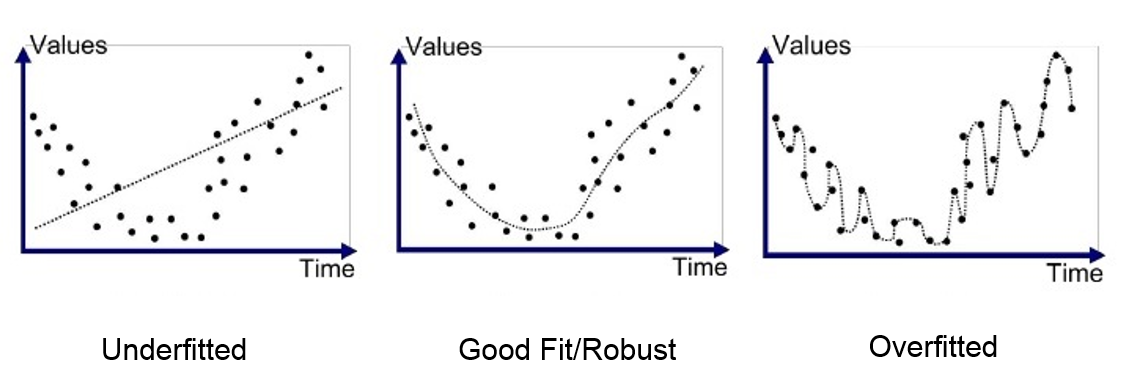

In [138]:
previsoes_treino = modelo_2.predict(x_treino_pd)
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
precisao_treino = precision_score(y_treino, previsoes_treino)

previsoes_teste = modelo_2.predict(x_teste_pd)
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
precisao_teste = precision_score(y_teste, previsoes_teste)

print('A acurácia no treino foi de %.2f%%' % (acuracia_treino*100))
print('A precisão no treino foi de %.2f%%' % (precisao_treino*100))
print('=====================================')
print('A acurácia no teste foi de %.2f%%' % (acuracia_teste*100))
print('A precisão no teste foi de %.2f%%' % (precisao_teste*100))

A acurácia no treino foi de 79.80%
A precisão no treino foi de 63.02%
A acurácia no teste foi de 78.56%
A precisão no teste foi de 61.25%


O desempenho do modelo é bem próximo tanto para os dados de treino, quanto para os dados de teste. Não indícios de overfitting.<br>

O overfitting pode ser tratado nas fases de feature engineering e otimização do modelo, que veremos em uma próxima aula.